<font color='blue' size=4><b>Комментарий ментора</b></font>

<font color='blue'>Привет, Мария! Меня зовут Денис Абрашин. Рад проверить твою работу. Предлагаю общаться на «ты». Если тебе по душе другой стиль обращения, просто измени "настройки" ниже. Они вступят в силу в следующий раз:</font>

- [x] общение на "ты"
- [ ] общение на "вы"

<font color='blue'>✨ Поздравляю с началом работы над финальным проектом! Мне уже не терпится взглянуть на твой блокнот в деталях, но в начале давай условимся об оформлении проверки, чтобы она была более наглядной и понятной. Для этого я буду использовать различные цвета и значки:</font>

<div class="alert alert-block alert-success">
✔️ <b>Зеленый текст</b> - все отлично
</div>

<div class="alert alert-block alert-warning">
⚠️ <b>Желтый текст</b> - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание
</div>

<div class="alert alert-block alert-danger">
❌ <b>Красный текст</b> - есть недочеты, которые следует исправить для усвоения правильных навыков и зачета работы
</div>

---

<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, и как они были исправлены.</font>

Ответы на мои комментарии при необходимости лучше тоже помечать вот так:

<div class="alert alert-block alert-info">
<b>Комментарий разработчика:</b> 
Текст комментария, вопроса, объяснения, пожелания
</div>

Для этого просто добавь в блокнот ячейку markdown следующего вида:
```html
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Текст комментария, вопроса, объяснения, пожелания
</div>
```

<font color='blue'><b>Вперёд к новым успехам! Каждый может!</b></font>

#  Прогнозирование оттока клиентов

**Описание проекта:** Компания «ТелеДом» — оператор связи, предоставляющий услуги фиксированной телефонии, интернета и дополнительных цифровых сервисов. Основная бизнес-задача компании — сокращение оттока клиентов. Для этого планируется внедрить модель прогнозирования, которая позволит заранее выявлять абонентов, склонных к расторжению договора.
Компания располагает данными о клиентах:
персональная информация (возраст, семья, наличие партнёра);
тарифы и подключённые услуги (тип интернета, дополнительные опции);
условия договора (срок, способ оплаты, наличие электронного чека).
На основе этих данных будет создана модель машинного обучения для предсказания оттока клиентов.

**Основная цель:** разработать модель классификации, которая предскажет вероятность ухода клиента.

**Бизнес-цель:** снизить отток абонентов и повысить доходность компании за счёт своевременного предложения промокодов и персонализированных условий.

**Ход работы:**

- Шаг 1. Загрузка данных
Загрузка данные и выполните их первичный осмотр.

- Шаг 2. Исследовательский анализ и предобработка данных

Выполним исследовательский анализ каждого датафрейма и при необходимости предобработку. 

- Шаг 3. Объединение данных

Объединим выбранные признаки в один датафрейм по ключу.

- Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма

Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполните предобработку. Проведем корреляционный анализ. 

- Шаг 5. Подготовка данных

Выполним подготовку данных для обучения модели. 

- Шаг 6. Обучение моделей машинного обучения

- Шаг 7. Выбор лучшей модели

- Шаг 8. Общий вывод и рекомендации заказчику


<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Очень хорошо, что блокнот начинается с подробного описания проекта, облегчающего погружение в предметную область.
</div>

In [1]:
!pip install phik -q

import time
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import (
    roc_auc_score, 
    roc_curve, 
    accuracy_score, 
    confusion_matrix, 
    classification_report
)

RANDOM_STATE = 250825


## Загрузка, исследовательский анализ  и предобработка данных

**Изучаем данные датафрейма contract**

In [2]:
try:
    contract = pd.read_csv('/datasets/contract_new.csv')
except FileNotFoundError:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1:</b> Было бы здорово предусмотреть один вариант загрузки локально и один по ссылке (как в описании проекта) на облачное хранилище, чтобы заказчик мог выполнить код у себя.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добавила варианты загрузки
</div>

In [3]:
#приведение название колонок в датафрейме к snake_case
contract.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', col.replace('ID', 'Id')).lower()
    for col in contract.columns
]
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Нам нужно построить целевую переменную на основе данных о контракте(по столбцу end_date) - 1 (ушел – не No), 0 (не ушел - No).

In [4]:
contract['customer_churn'] = contract['end_date'].apply(lambda x: 0 if x == 'No' else 1)


<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Целевая переменная создана правильно.
</div>

Проверим наличие пропусков

In [5]:
contract.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
customer_churn       0
dtype: int64

In [6]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   customer_churn     7043 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


Здесь видим, что не у всех колонок корректный тип. Изменим тип колонки begin_date на datetime и total_charges на float

In [7]:
contract['begin_date'] = pd.to_datetime(contract['begin_date'])
contract['end_date'] = pd.to_datetime(contract['end_date'], errors='coerce')
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors='coerce', downcast="float")

contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float32       
 8   customer_churn     7043 non-null   int64         
dtypes: datetime64[ns](2), float32(1), float64(1), int64(1), object(4)
memory usage: 467.8+ KB


Видим, что после изменения типа данных появились пропуски в данных. В столбце end_date у 1101 клиентов дата окончания договора стоит (это те, кто ушёл). У остальных — было "No", и после to_datetime(errors='coerce') оно превратилось в NaT. Но мы уже построили целевую переменную customer_churn, и сама колонка end_date дальше в обучение модели не пойдёт (иначе будет утечка информации), поэтому оставим пропуски как есть. В столбце total_charges появилось 11 строк NaN. Такое могло возникнуть из-за того, что в исходном файле в этих строках было пустое значение (например, у новых клиентов, у которых только начался контракт), поэтому здесь мы заменим пропуски нулями. Изучим строки с пропусками в total_charges

In [8]:
contract[contract['total_charges'].isna()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_churn
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,0


Известно, что информация о договорах актуальна на 1 февраля 2020, поэтому если в значениях begin_date стоит 2020-02-01 и monthly_charges больше единицы, то это и есть новый клиент, поэтому обоснованно пропуски заполнить 0, ведь в нашем датасете все строки удовлетворяют этим условиям

In [9]:
contract['total_charges'] = contract['total_charges'].fillna(0)
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float32       
 8   customer_churn     7043 non-null   int64         
dtypes: datetime64[ns](2), float32(1), float64(1), int64(1), object(4)
memory usage: 467.8+ KB


<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Пропуски заполнены обоснованно.
</div>

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: То, что пропуски у новых клиентов, хорошо бы доказать на данных, а не предположительно.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Добавила обоснование, почему пропуски можно заполнить нулями
<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Спасибо!
</div>
</div>

Посмотрим на уникальные значения в столбцах с категориальными значениями

In [10]:
categorical_columns = ['type', 'paperless_billing', 'payment_method']
for column in categorical_columns:
    unique_values = contract[column].unique()
    print(f"Уникальные значения в столбце '{column}': {unique_values}")

Уникальные значения в столбце 'type': ['Month-to-month' 'One year' 'Two year']
Уникальные значения в столбце 'paperless_billing': ['Yes' 'No']
Уникальные значения в столбце 'payment_method': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Проверим наличие дубликатов

In [11]:
contract.duplicated().sum()

0

In [12]:
contract['customer_id'].nunique(), contract.shape[0]


(7043, 7043)

Видим, что каждый клиент является уникальным. То есть дубликатов не наблюдается

In [13]:
contract.describe()

,monthly_charges,total_charges,customer_churn
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2115.312744,0.156325
std,30.090047,2112.742676,0.363189
min,18.250000,0.000000,0.000000
25%,35.500000,436.750000,0.000000
50%,70.350000,1343.349976,0.000000
75%,89.850000,3236.689941,0.000000
max,118.750000,9221.379883,1.000000


По данной таблице можно сделать следующие выводы:

- monthly_charges (ежемесячные расходы)
Значения: от 18.25 до 118.75.
Медиана: ≈70  половина клиентов платит меньше этой суммы, половина — больше.
Большая часть клиентов укладывается в диапазон 35–90 .
Распределение довольно широкое (std ≈ 30).

- total_charges (накопленные расходы за всё время)
Минимум: 0
Максимум: 9221.38 → клиенты с долгим стажем и/или дорогими услугами.
Медиана: ≈1343.
Распределение сильно асимметричное (среднее 2115 > медиана 1343).
Большинство клиентов — с относительно небольшими накопленными расходами, но есть небольшая группа клиентов с высокими значениями.

**Изучаем данные датафрейма personal_info**

In [14]:
personal_info = pd.read_csv('/datasets/personal_new.csv')
personal_info.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [15]:
#приведение название колонок в датафрейме к snake_case
personal_info.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', col.replace('ID', 'Id')).lower()
    for col in personal_info.columns
]
personal_info.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


В данном датафрейме преобразуем категориальный столбец senior_citizen по аналогии с другими столбцами в строковый тип для удобства

In [16]:
personal_info['senior_citizen'] = personal_info['senior_citizen'].apply(lambda x: 'Yes' if x==1 else 'No')

In [17]:
personal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


Пропусков нет, у всех признаков корректный тип данных

In [18]:
personal_info.duplicated().sum()

0

In [19]:
personal_info['customer_id'].nunique(), personal_info.shape[0]


(7043, 7043)

Видим, что каждый клиент является уникальным. То есть дубликатов не наблюдается

In [20]:
personal_info.describe()

,customer_id,gender,senior_citizen,partner,dependents
count,7043,7043,7043,7043,7043
unique,7043,2,2,2,2
top,8808-ELEHO,Male,No,No,No
freq,1,3555,5901,3641,4933


**Анализ признаков**
- customer_id
Уникальных значений = 7043, совпадает с числом строк → идентификатор клиента.

- gender
2 уникальных значения: Male / Female.
Почти равномерное распределение (3555 мужчин, 3488 женщин).

- senior_citizen
2 значения (Yes/No).
Большинство = "No" (84%), "Yes" — 16%.

- partner
2 значения (Yes/No).
Большинство = "No" (≈ 59%).

- dependents
2 значения (Yes/No).
Большинство = "No" (≈ 70%).


**Изучаем данные датафрейма internet**

In [21]:
internet = pd.read_csv('/datasets/internet_new.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [22]:
#приведение название колонок в датафрейме к snake_case
internet.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', col.replace('ID', 'Id').replace('TV', 'Tv')).lower()
    for col in internet.columns
]
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Пропусков нет, у всех признаков корректный тип данных

Посмотрим на уникальные значения в столбце internet_service

In [24]:
unique_values = internet['internet_service'].unique()
print(f"Уникальные значения в столбце internet_service: {unique_values}")

Уникальные значения в столбце internet_service: ['DSL' 'Fiber optic']


In [25]:
internet.duplicated().sum()

0

In [26]:
internet['customer_id'].nunique(), internet.shape[0]


(5517, 5517)

Видим, что каждый клиент является уникальным. Дубликатов не наблюдается

In [27]:
internet.describe()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3536-IQCTX,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


По данной таблице можно сделать следующие выводы:

- customer_id
Все уникальные (count = unique = 5517)
- internet_service
Две категории (DSL, Fiber optic) на top указано Fiber optic: 3096 клиентов, значит большинство подключено через Fiber optic.
Другой тип (DSL) 2421 клиента.
- Бинарные признаки (Yes/No):
OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
Все имеют 2 уникальных значения: Yes и No.
Большинство клиентов не подключили эти услуги (No на top).
Примерно от 2800 до 3500 клиентов имеют No, остальное — Yes.

**Изучаем данные датафрейма phone**

In [28]:
phone = pd.read_csv('/datasets/phone_new.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [29]:
#приведение название колонок в датафрейме к snake_case
phone.columns = [
    re.sub(r'(?<!^)(?=[A-Z])', '_', col.replace('ID', 'Id')).lower()
    for col in phone.columns
]
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [30]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Пропусков нет, у всех признаков корректный тип данных

In [31]:
phone.duplicated().sum()

0

In [32]:
phone['customer_id'].nunique(), phone.shape[0]



(6361, 6361)

Видим, что каждый клиент является уникальным. Дубликатов не наблюдается

In [33]:
phone.describe()

,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,8808-ELEHO,No
freq,1,3390


- multiple_lines
Бинарный признак: Yes / No.
Большинство клиентов не имеют несколько линий (No = 3390).
Количество уникальных значений = 2 

<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Отдельные датафреймы изучены.
</div>

## Объединение данных

Необходимо объединить все файлы по столбцу customerID при этом нельзя терять клиентов для этого будем использовать merge, how='left', так мы не потеряем клиентов из основной таблицы.

In [34]:
data = data = pd.merge(contract, personal_info, on='customer_id', how='left')

# добавляем internet
data = pd.merge(data, internet, on='customer_id', how='left')

# добавляем phone
data = pd.merge(data, phone, on='customer_id', how='left')

data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_churn,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.040001,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.840088,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.169998,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.599976,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.500000,0,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Объединение датафреймов выполнено правильно.
</div>

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float32       
 8   customer_churn     7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   5517 non-null   object        
 14  online_s

По данной таблице видим, что в столбцах end_date, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies, multiple_lines наблюдаются пропуски.

Возможные причины:

- В столбце end_date причина в том, что данные заполнены только у тех, кто ушли, у остальных пропуски. Так как на основе этого признака мы создали целевую переменную customer_churn, то пропуски обрабатывать не будем

- В столбцах internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv, streaming_movies клиенты могли не подключать интернет. Эти столбцы из датасета internet, пропуски заполним "No internet service"

- В столбце multiple_lines клиенты могли не подключать телефон. Этот столбец из датасета phone, пропуски заполним "No phone service"

In [36]:
internet_cols = ['internet_service', 'online_security', 'online_backup',
                 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

data[internet_cols] = data[internet_cols].fillna("No internet service")
data['multiple_lines'] = data['multiple_lines'].fillna("No phone service")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float32       
 8   customer_churn     7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Пропуски заполнены обоснованно.
</div>

## Исследовательский анализ и предобработка данных объединённого датафрейма

In [37]:
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_churn,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.040001,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,No phone service
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.840088,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.169998,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.599976,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,No phone service
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.500000,0,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


На основе данных признаков мы можем создать также длительность пользования услугами в днях, известно, что информация актуальна на 1 февраля 2020 г.

<div class="alert alert-block alert-success">
✔️ <b>Ревью 1</b>: Молодец, что проявляешь творческий подход к созданию новых признаков, которые могут потенциально улучшить модель.
</div>

In [38]:
data['use_duration'] = np.where(data['end_date'].notna(), (data['end_date'] - data['begin_date']).dt.days,
                               (pd.to_datetime("2020-02-01") - data['begin_date']).dt.days)
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_churn,gender,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,use_duration
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,31.040001,0,Female,...,No,DSL,No,Yes,No,No,No,No,No phone service,31.0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,2071.840088,0,Male,...,No,DSL,Yes,No,Yes,No,No,No,No,1036.0
2,3668-QPYBK,2019-10-01,NaT,Month-to-month,Yes,Mailed check,53.85,226.169998,0,Male,...,No,DSL,Yes,Yes,No,No,No,No,No,123.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1960.599976,0,Male,...,No,DSL,Yes,No,Yes,Yes,No,No,No phone service,1371.0
4,9237-HQITU,2019-09-01,NaT,Month-to-month,Yes,Electronic check,70.70,353.500000,0,Female,...,No,Fiber optic,No,No,No,No,No,No,No,153.0


<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: При расчете этого признака из pd.to_datetime("2020-02-01") вычитать можно только для действующих клиентов. У ушедших есть своя индивидуальная дата ухода (она для них и будет датой актуальности), из которой нужно вычитать дату начала контракта. При текущем варианте происходит утечка целевой переменной в признак, так как признак будет высоко коррелировать с уходом очень "стареньких" клиентов.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Подкорректировала
</div>

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float32       
 8   customer_churn     7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

Для категориальных признаков построим круговые диаграммы, для числовых гистограммы


Value counts for type:
Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64


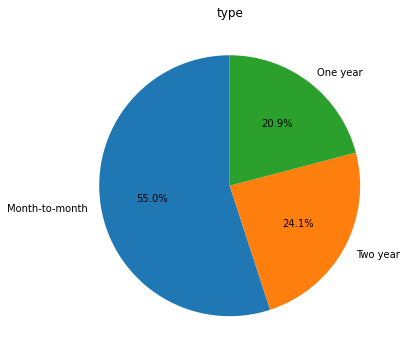


Value counts for paperless_billing:
Yes    4171
No     2872
Name: paperless_billing, dtype: int64


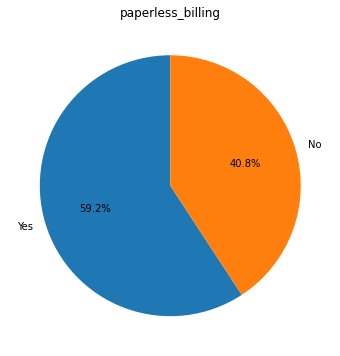


Value counts for payment_method:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64


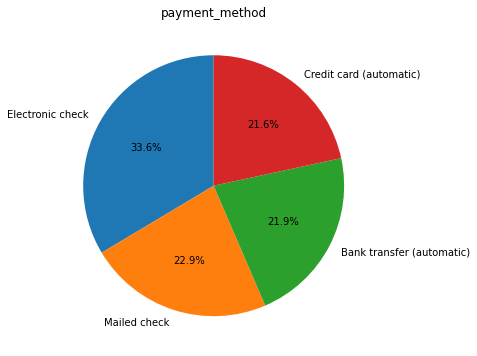


Value counts for gender:
Male      3555
Female    3488
Name: gender, dtype: int64


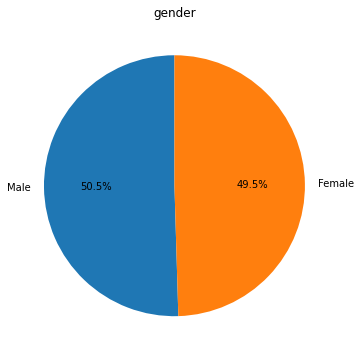


Value counts for senior_citizen:
No     5901
Yes    1142
Name: senior_citizen, dtype: int64


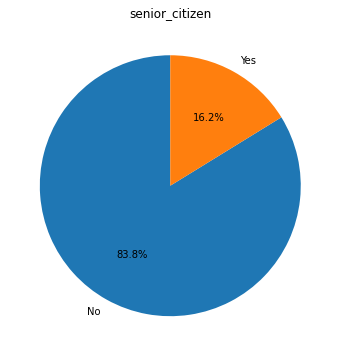


Value counts for partner:
No     3641
Yes    3402
Name: partner, dtype: int64


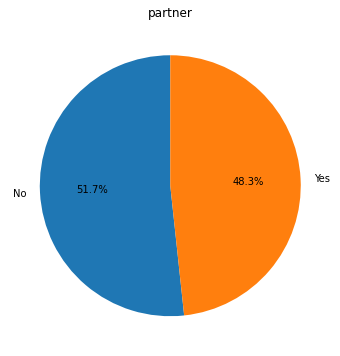


Value counts for dependents:
No     4933
Yes    2110
Name: dependents, dtype: int64


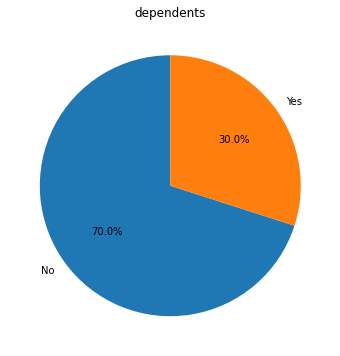


Value counts for internet_service:
Fiber optic            3096
DSL                    2421
No internet service    1526
Name: internet_service, dtype: int64


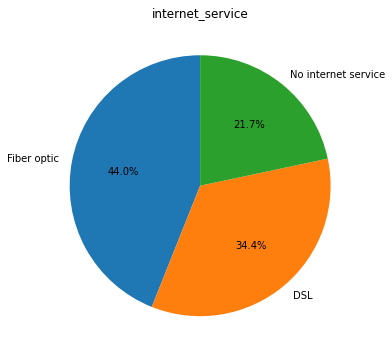


Value counts for multiple_lines:
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64


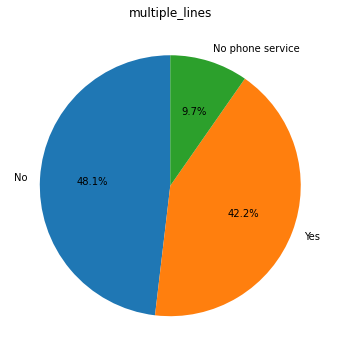


Value counts for online_security:
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64


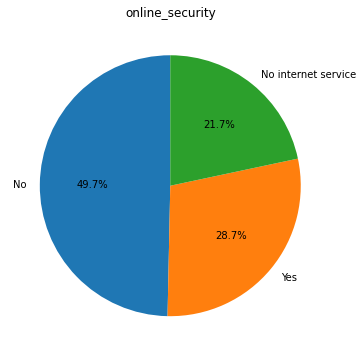


Value counts for online_backup:
No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64


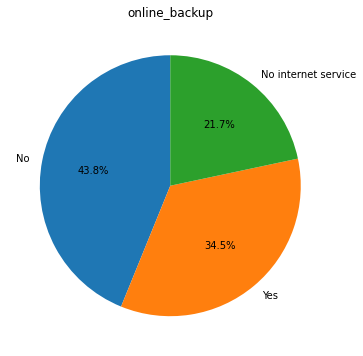


Value counts for device_protection:
No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64


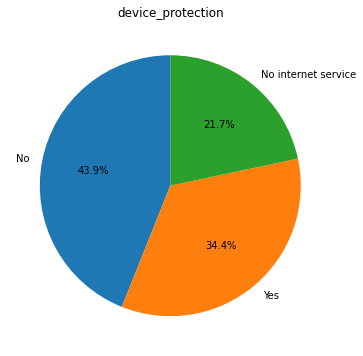


Value counts for tech_support:
No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64


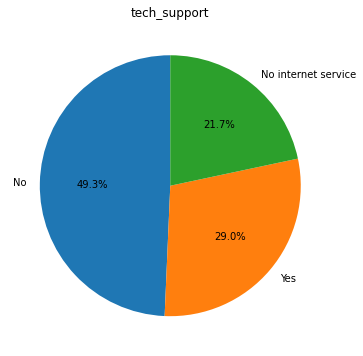


Value counts for streaming_tv:
No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64


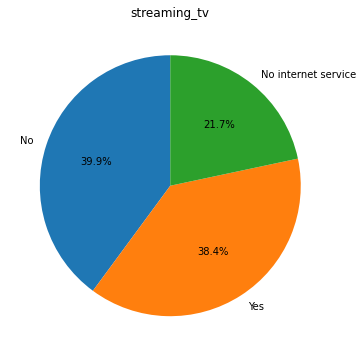


Value counts for streaming_movies:
No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64


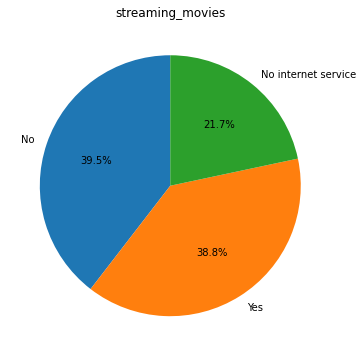

In [40]:
cat_cols = ['type', 'paperless_billing', 'payment_method',
           'gender', 'senior_citizen', 'partner', 'dependents',
           'internet_service', 'multiple_lines', 'online_security', 
           'online_backup', 'device_protection', 'tech_support', 
           'streaming_tv', 'streaming_movies']

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())
    
    # круговая диаграмма
    plt.figure(figsize=(6,6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(col)
    plt.ylabel('')  
    plt.show()

По данным графикам можем сделать следующие выводы:

- В столбце type чаще всего встречается ежемесячный тип договора, реже всего годовой

- По  столбцу PaperlessBilling видно, что чаще всего счета выставляются по электронной почте. 
- По столбцу PaymentMethod видим, что чаще всего оплачивают с помощью электронных чеков, а реже с помощью кредитной карты

- По стобцу gender видим, что доля мужчин и женщин примерно равна, но все же количество мужчин слегка преобладает

- По столбцу SeniorCitizen видим, что большинство клиентов не являются пенсионерами

- По столбцу Partner можно сказать, что у большинства нет супруга/супруги

- По столбцу Dependents можно сказать, что у большинства нет иждивенцев

- По столбцу InternetService видим, что большинство клиентов используют Fiber optic (3096) и DSL (2421). Примерно 15% не имеют интернет-сервиса (1526).

- По столбцу Multiple Lines видим, что больше клиентов без дополнительной линии. С дополнительной чуть меньше, но значительная часть. Около 10% клиентов без телефонной линии.

- По столбцу Online Security большинство клиентов без услуги. Примерно 37% клиентов пользуются.

- По столбцу Online Backup большинство клиентов не используют облачное хранилище файлов. Около 44% клиентов подключены.

- Device Protection:
Большинство клиентов не используют защиту устройств.
Около 44% подключены.

- Tech Support:
Большинство не используют техподдержку.
Примерно 37% используют.

- Streaming TV:

- No (2810) и Yes (2707) почти равное распределение, около 47% используют стриминг ТВ.

- Streaming Movies: 
No (2785) и Yes (2732) — почти равное количество клиентов подключено к стримингу фильмов.


Также построим столбчатые диаграммы с учетом разбиения по целевой переменной

<div class="alert alert-block alert-warning">
⚠️ <s><b>Ревью 1</b>: Как говорили на вводном вебинаре, нагляднее были бы нормированные столбчатые диаграммы. Тогда доли уходящих легче бы сравнивались и снизился бы риск ошибок в выводах.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Хорошо, учту)
</div>

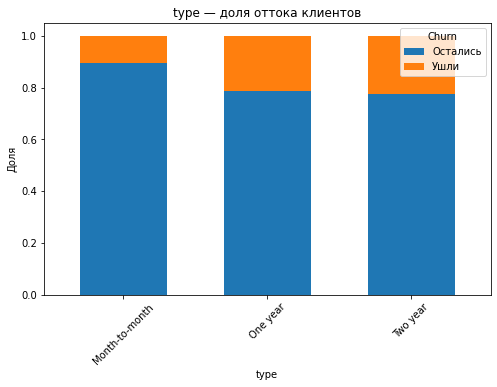

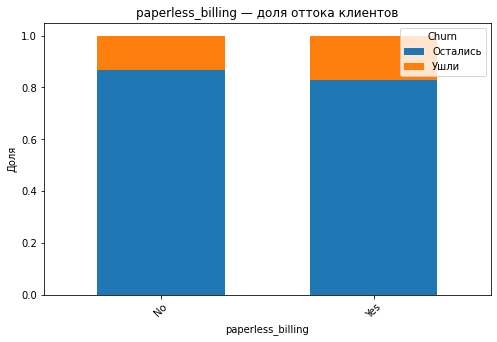

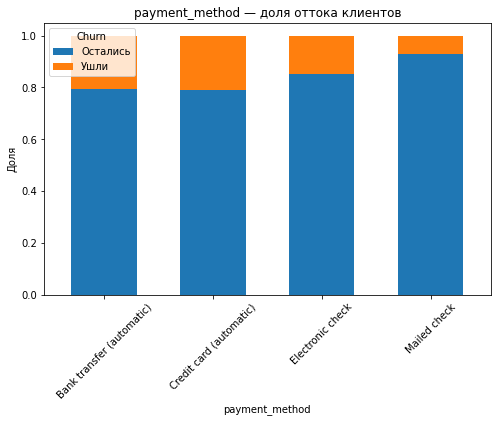

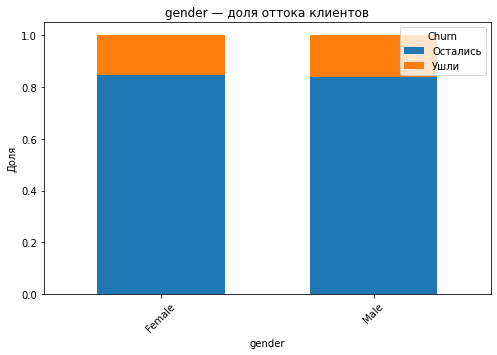

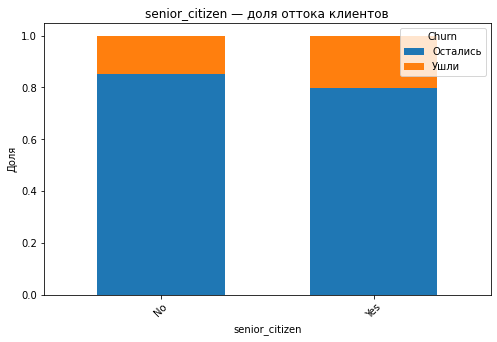

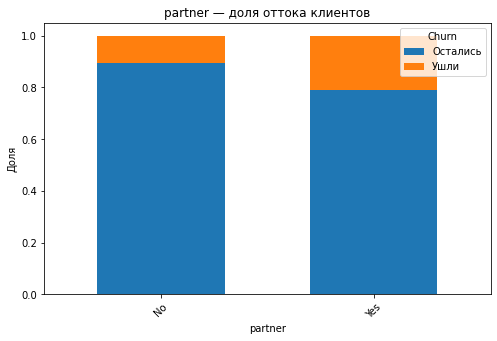

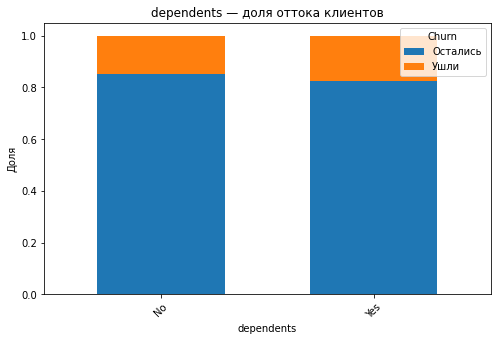

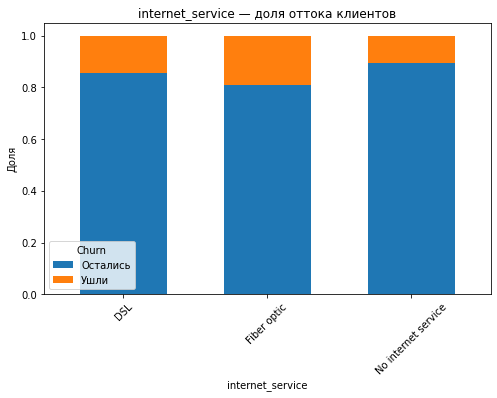

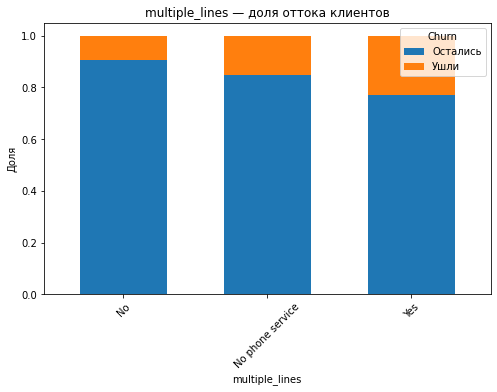

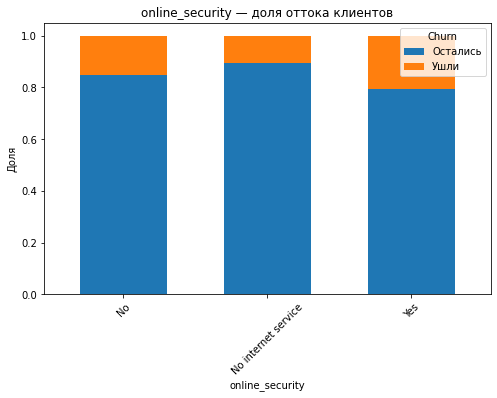

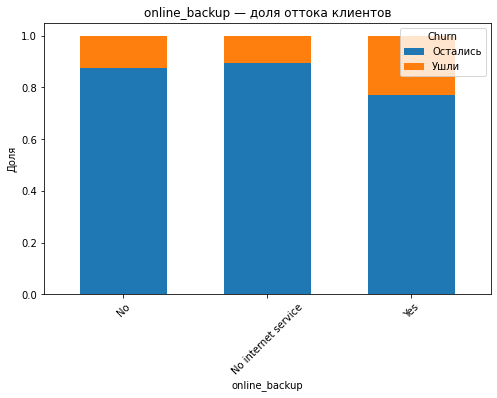

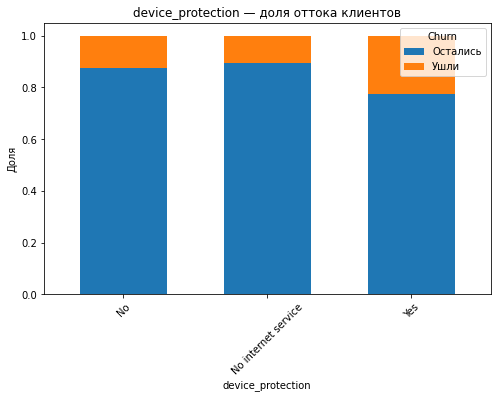

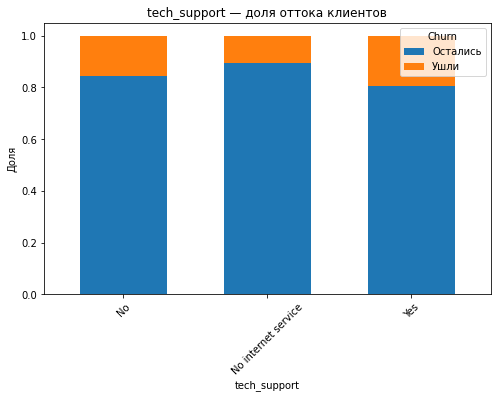

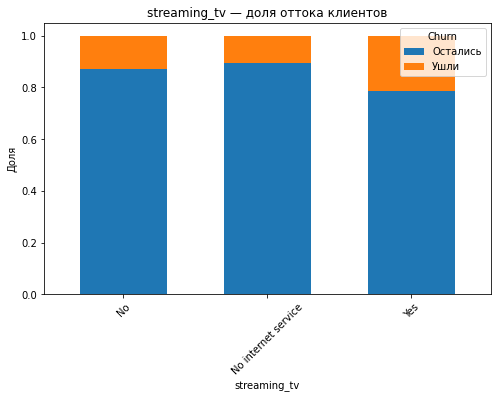

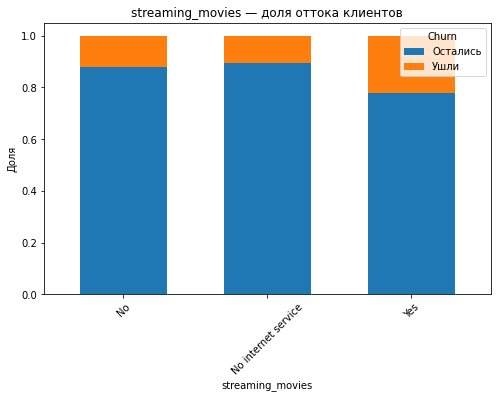

In [41]:
for col in cat_cols:
    # Считаем распределение по churn
    df_plot = pd.crosstab(data[col], data['customer_churn'], normalize='index')

    # Рисуем stacked bar
    df_plot.plot(
        kind="bar", 
        stacked=True, 
        figsize=(8,5), 
        color=['#1f77b4', '#ff7f0e'], 
        width=0.6
    )

    plt.title(f"{col} — доля оттока клиентов")
    plt.ylabel("Доля")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title="Churn", labels=['Остались', 'Ушли'])
    plt.show()

Чтобы учесть дисбаланс классов, нужно нормализовать данные, для этого построим сводную таблицу, где строки это уникальные значения признака col (например, разные способы оплаты),
столбцы - классы customer_churn (0 = остались, 1 = ушли),


По данным графикам можем сделать следующие выводы:

- В столбце type отток меньше всего наблюдается при оплате помесячно. Отток при ежегодной оплате и оплате раз в 2 года одинаков, выше, чем при помесячной

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: Вывод выше неправилен, так как не учитывает дисбаланс классов в целевой переменной и в признаках. Тип ещё как влияет, так как клиенты сс помесячной оплатой менее склонны к уходу, чем остальные (которых просто меньше, поэтому и кажется, что признак не влияет). Здесь нужно переделать, а ниже перепроверить и переделать при необходимости. Как говорили, на вводном вебинаре, выводы делать легче по нормированным диаграммам, пример которой приведен в презентации.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Изменила график
<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Спасибо!
</div>
</div>

- По  столбцу PaperlessBilling видно, что чаще всего счета выставляются по электронной почте. Отток выше в категории Yes, но разница не критична, хотя чуть больше у клиентов с безбумажной оплатой.

- По столбцу PaymentMethod видим, что отток клиентов меньше всего наблюдается в Mailed check, на втором месте Electronic check, при других способах оплаты отток примерно одинаков, больше

- По стобцу gender видим, что отток не зависит от пола, везде примерно одинаковый процент ушедших

- По столбцу SeniorCitizen видим, что отток среди пенсионеров больше, чем у других клиентов

- По столбцу Partner можно сказать, что отток тех, у кого есть партнер больше, чем у тех, у кого его нет

- По столбцу Dependents можно сказать, что отток примерно одинаков в обеих группах. Но все же отток среди тех, у кого нет иждивенцов незначительно больше, чем у тех, у кого они есть

- По столбцу InternetService видим, что больше всего ушедших среди тех, кто использует оптоволокно, меньше всего - у тех, кто не имеют интернет-сервиса

- По столбцу Multiple Lines видим, что больше всего ушедших среди тех, кто использует дополнительную линию

- По столбцу Online Security больше всего ушедших, у кого есть услуга межсетевого экрана

- По столбцу Online Backup отток среди тех у кого есть облачное хранилище больше, чем среди тех, у кого его нет

- Device Protection:
Отток среди тех, кто использует защиту устройств больше, чем среди тех, кто ее не использует

- Tech Support:
Отток среди тех, кто используют техподдержку незначительно выше, чем среди тех, кто ее не использует

- Streaming TV: Отток среди тех, кто использует онлайн-ТВ больше, чем среди тех кто не использует

- Streaming Movies: 
Отток среди тех, кто использует онлайн-кинотеатр больше, чем среди тех кто не использует


Теперь проанализируем числовые признаки

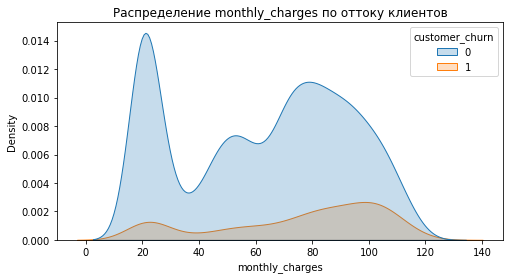

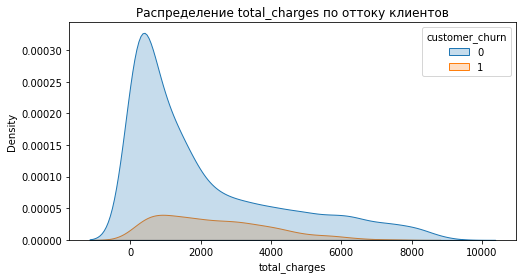

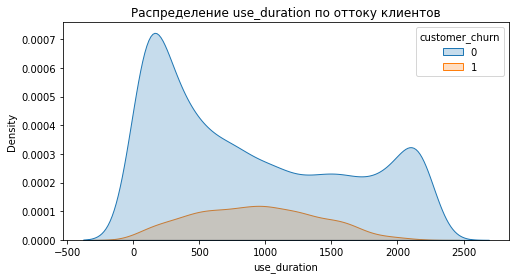

In [42]:
numerical_cols = ['monthly_charges', 'total_charges', 'use_duration']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=data, x=col, hue='customer_churn', fill=True)
    plt.title(f'Распределение {col} по оттоку клиентов')
    plt.show()

1. Monthly Charges (ежемесячные платежи)

У клиентов без оттока (синие) распределение имеет пики на низких и средних значениях (20–50 и 60–80).
У клиентов с оттоком (оранжевые) больше наблюдений при высоких платежах (70–120).
Таким образом, среди клиентов с оттоком чаще встречаются высокие ежемесячные платежи, но распределение неоднородное и имеет несколько пиков. То есть можно говорить, что повышенные платежи могут быть фактором риска, однако сама по себе высокая сумма ещё не гарантирует отток.

<div class="alert alert-block alert-danger">
❌ <b>Ревью 1</b>: <s>"чем выше ежемесячная плата, тем больше вероятность оттока" - но ведь у оттока тоже два пика, а после 100 начинается падение. Значит нельзя сказать, что "чем выше ежемесячная плата, тем больше вероятность оттока".</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Подкорректировала
</div>

2. Total Charges (общая сумма платежей за всё время)

У клиентов без оттока распределение имеет длинный «хвост» — много тех, кто пользовался услугами долго и накопил большие суммы.
У клиентов с оттоком значительная часть сосредоточена в диапазоне 0–2000.
Клиенты чаще уходят на ранних этапах, не успев накопить крупные суммы оплат. Те, кто остаётся дольше, как правило, более лояльны.

3. Use Duration (длительность пользования, дни)

У клиентов без оттока наблюдается 2 пика на низких(0-250) и высоких значениях(2000-2250). У клиентов с оттоком больше наблюдений при средних значениях(500-1500).

Таким образом, можно сказать, что отток клиентов происходит после того, как они достаточное время использовали услуги и смогли понять нужно ли это им или нет, гораздо реже происходит отток на ранних и поздних этапах использования.

<div class="alert alert-block alert-danger">
❌ <b>Ревью 1</b>: <s>Выводы нужно переделать после исправления признака.</s>
</div>


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Переформулировала выводы
</div>

0    5942
1    1101
Name: customer_churn, dtype: int64
0    0.843675
1    0.156325
Name: customer_churn, dtype: float64


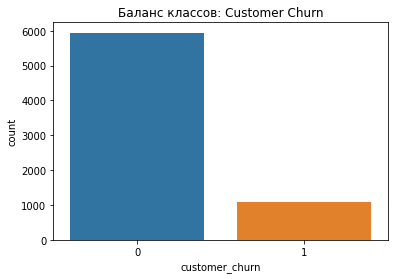

In [43]:
# Количество клиентов по классам
print(data['customer_churn'].value_counts())

# Доли классов
print(data['customer_churn'].value_counts(normalize=True))

sns.countplot(data=data, x='customer_churn')
plt.title("Баланс классов: Customer Churn")
plt.show()

5942 клиентов (84.4%) остались 
1101 клиентов (15.6%) ушли 

Это говорит о том, что датасет несбалансированный (большинство клиентов остались, меньшинство ушли). Это важно учитывать при обучении модели

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1101 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float32       
 8   customer_churn     7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   object        
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>: Исправление признака длительности повлияет на дальнейшую работу. Нужно перепроверить блокнот ниже и исправить при необходимости.</s>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Учла изменения, use_duration - begin_date являются мультиколлинеарными признаками
</div>

<Figure size 1080x720 with 0 Axes>

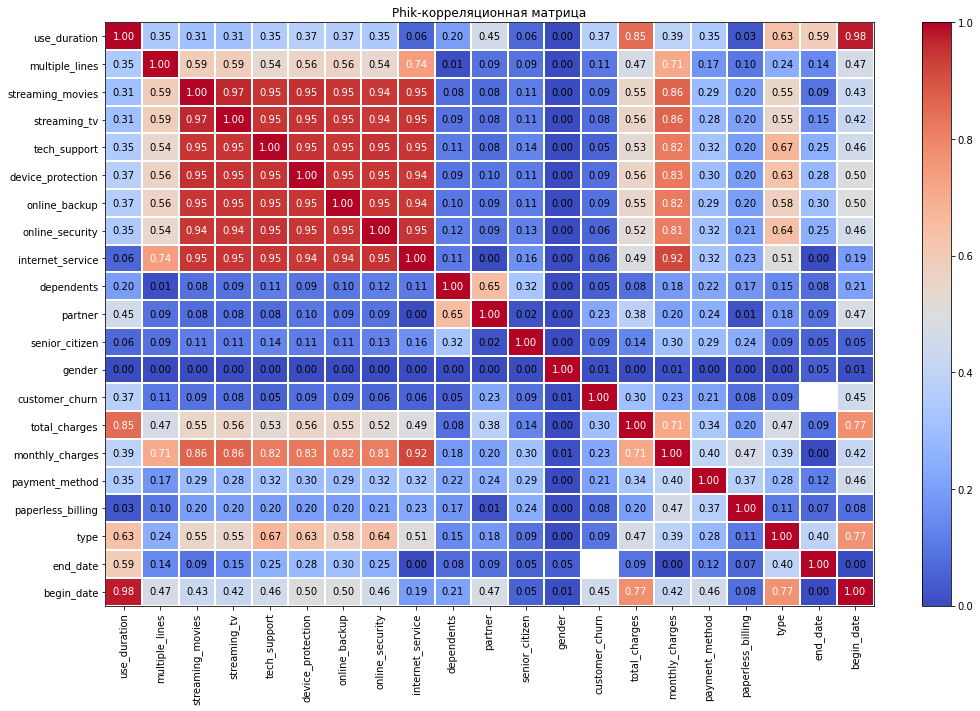

In [45]:
quantitative_features = ['monthly_charges', 'total_charges', 'use_duration']
data = data.drop(columns=['customer_id'])
# Рассчет корреляционной матрицы
correlation_matrix = data.phik_matrix(interval_cols=quantitative_features)

# Визуализация корреляционной матрицы
plt.figure(figsize=(15,10))
plot_correlation_matrix(correlation_matrix.values,
                        x_labels=correlation_matrix.columns,
                        y_labels=correlation_matrix.index,
                        vmin=0, vmax=1, color_map='coolwarm',
                       figsize=(15,10))
plt.title('Phik-корреляционная матрица')
plt.show()

По данной матрице корреляций можно заметить, что мультиколлинеарность встречается у признаков streaming_movies, streaming_tv, tech_support, device_protection, online_backup, online_security, internet_service, begin_date, use_duration — между ними корреляция (0.94–0.98). 
total_charges и use_duration — высокая корреляция (0.80). internet_service и monthly_charges(0.92), это можно объяснить тем, что internet_service — категориальный признак: "DSL", "Fiber optic", "No".
monthly_charges — числовой,  отражает стоимость тарифа.
Очевидно, что если internet_service = "No", то monthly_charges меньше, а если "Fiber optic", то выше отсюда и сильная корреляция.
monthly_charges сильно коррелирует с интернет-сервисами и стриминговыми услугами (0.82–0.86).
customer_churn умеренно коррелирует с total_charges, monthly_charges, internet_service (0.45–0.55).
partner и dependents = 0.65

Так как begin_date и use_duration = 0.98(мультиколлинеарность), удалим признак begin_date, тк use_duration более интерпретируемый. Чтобы избавиться от мультиколлинеарности в признаках streaming_movies, streaming_tv, tech_support, device_protection, online_backup, online_security, internet_service добавим признак, который будет содержать количество подключенных сервисов. Также удалим признак end_date, тк целевую переменную customer_churn формировали на основе end_date из-за чего он дублирует целевую переменную

<div class="alert alert-block alert-warning">

⚠️ <b>Ревью 2</b>: Абсолютные даты нужно удалить не из-за мультиколлинеарности, а так как модель будет применяться на данных, в которых таких дат уже не будет.
    
</div>

In [46]:
data = data.drop(columns=['begin_date', 'end_date'])
multicorr_columns = ['streaming_movies', 'streaming_tv', 
                     'tech_support', 'device_protection', 'online_backup', 
                     'online_security']

# Создаём новый признак — количество подключённых сервисов
data['num_services'] = data[multicorr_columns].apply(lambda row: (row == 'Yes').sum(), axis=1)

# Удаляем признаки с сильной мультиколлинеарностью
data = data.drop(columns=multicorr_columns)


data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_churn,gender,senior_citizen,partner,dependents,internet_service,multiple_lines,use_duration,num_services
0,Month-to-month,Yes,Electronic check,29.85,31.040001,0,Female,No,Yes,No,DSL,No phone service,31.0,1
1,One year,No,Mailed check,56.95,2071.840088,0,Male,No,No,No,DSL,No,1036.0,2
2,Month-to-month,Yes,Mailed check,53.85,226.169998,0,Male,No,No,No,DSL,No,123.0,2
3,One year,No,Bank transfer (automatic),42.30,1960.599976,0,Male,No,No,No,DSL,No phone service,1371.0,3
4,Month-to-month,Yes,Electronic check,70.70,353.500000,0,Female,No,No,No,Fiber optic,No,153.0,0


<Figure size 1080x720 with 0 Axes>

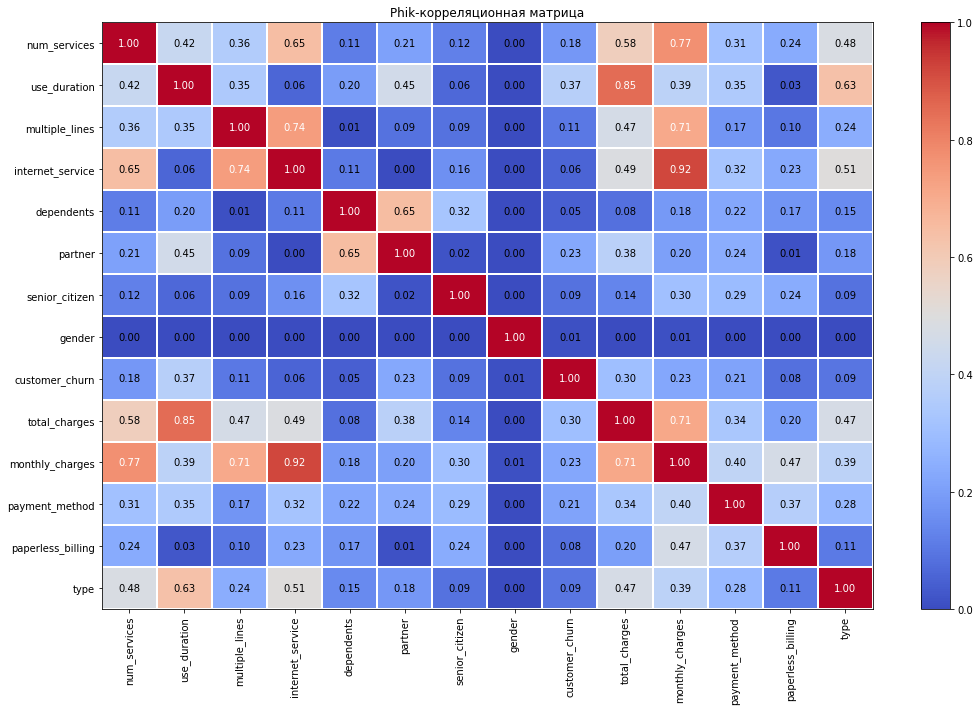

In [47]:
# Рассчет корреляционной матрицы
correlation_matrix = data.phik_matrix(interval_cols=quantitative_features)

# Визуализация корреляционной матрицы
plt.figure(figsize=(15,10))
plot_correlation_matrix(correlation_matrix.values,
                        x_labels=correlation_matrix.columns,
                        y_labels=correlation_matrix.index,
                        vmin=0, vmax=1, color_map='coolwarm',
                       figsize=(15,10))
plt.title('Phik-корреляционная матрица')
plt.show()

## Подготовка данных

Сначала подготовим данные для обучения, для этого выполним One-Hot Encoding и масштабирование данных

In [48]:
X = data.drop(columns='customer_churn', axis=1)
y = data['customer_churn']

0    5942
1    1101
Name: customer_churn, dtype: int64
0    0.843675
1    0.156325
Name: customer_churn, dtype: float64


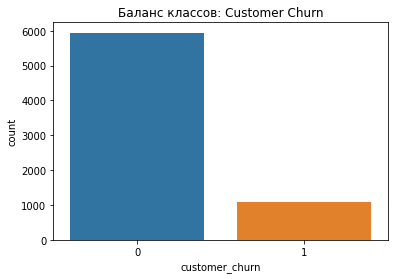

In [49]:
# Количество клиентов по классам
print(y.value_counts())

# Доли классов
print(y.value_counts(normalize=True))

sns.countplot(x=y)
plt.title("Баланс классов: Customer Churn")
plt.show()

Видим, что классы не сбалансированы. При разделении выборок на тестовую и обучающую добавим стратификацию, тк без нее классы могут быть несбалансированны в выборках

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=250825, stratify=y)

In [51]:
print('Размерность выборки X_train: ', X_train.shape)
print('Размерность выборки X_test: ', X_test.shape)
print('Размерность выборки y_train: ', y_train.shape)
print('Размерность выборки y_test: ', y_test.shape)

Размерность выборки X_train:  (5282, 13)
Размерность выборки X_test:  (1761, 13)
Размерность выборки y_train:  (5282,)
Размерность выборки y_test:  (1761,)


<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Разделение на выборки сделано правильно.
</div>

In [52]:
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,customer_churn,gender,senior_citizen,partner,dependents,internet_service,multiple_lines,use_duration,num_services
0,Month-to-month,Yes,Electronic check,29.85,31.040001,0,Female,No,Yes,No,DSL,No phone service,31.0,1
1,One year,No,Mailed check,56.95,2071.840088,0,Male,No,No,No,DSL,No,1036.0,2
2,Month-to-month,Yes,Mailed check,53.85,226.169998,0,Male,No,No,No,DSL,No,123.0,2
3,One year,No,Bank transfer (automatic),42.30,1960.599976,0,Male,No,No,No,DSL,No phone service,1371.0,3
4,Month-to-month,Yes,Electronic check,70.70,353.500000,0,Female,No,No,No,Fiber optic,No,153.0,0


В наших данных отсутствуют ранговые и порядковые признаки, поэтому OrdinalEncoder не потребуется. Для One-Hot Encoding выберем столбцы 'type', 'paperless_billing', 'payment_method', 'gender', 
                    'senior_citizen', 'partner', 'dependents', 
                    'internet_service', 'multiple_lines'. Остальные признаки - числовые.

In [53]:
cat_cols = ['type', 'paperless_billing', 'payment_method', 'gender', 
                    'senior_citizen', 'partner', 'dependents', 
                    'internet_service', 'multiple_lines']
num_cols = ['monthly_charges', 'total_charges', 'use_duration', 'num_services']

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

Для обучения будем использовать следующие модели:

1) Логистическая регрессия

Плюсы:
- Простая и хорошо интерпретируемая модель можно понять, какие признаки влияют на отток.
- Быстро обучается даже на больших данных.
- Хорошо работает, если связь между признаками и целевой переменной линейная.

Минусы:
- Не справляется с сложными нелинейными зависимостями.
- Чувствительна к мультиколлинеарности между признаками 

2) Случайный лес

Плюсы:
- Работает с нелинейными зависимостями и взаимодействиями признаков.
- Не чувствителен к мультиколлинеарности 
- Устойчив к выбросам и пропущенным значениям

Минусы:
- Требует больше памяти и времени на обучение по сравнению с линейными моделями.
- Модель труднее интерпретировать 
- Может переобучаться на небольших выборках при большой глубине деревьев.

3) Бустинг

Плюсы:
- Легко обрабатывает пропущенные значения и категориальные признаки (особенно CatBoost).
- Учитывает сложные нелинейные зависимости и взаимодействия между признаками.

Минусы:
- Сложнее в интерпретации, чем логистическая регрессия.
- Требует подбора множества гиперпараметров, из-за чего обучение дольше.
- Может переобучаться 

## Обучение моделей машинного обучения

**Логистическая регрессия**

In [55]:
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE))
])

In [56]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2']
}

grid_lr = GridSearchCV(
    lr_pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие гиперпараметры:", grid_lr.best_params_)

# Лучший ROC-AUC по кросс-валидации
best_score = grid_lr.best_score_
print(f"Лучший ROC-AUC (CV): {best_score:.3f}")

# Время обучения финальной модели на всех данных
refit_time = grid_lr.refit_time_
print(f"Время обучения лучшей модели (refit_time_): {refit_time:.2f} секунд")

Лучшие гиперпараметры: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Лучший ROC-AUC (CV): 0.763
Время обучения лучшей модели (refit_time_): 0.40 секунд


**Выводы по LogisticRegression:**

Модель с наилучшим качеством (по ROC-AUC на кросс-валидации):

LogisticRegression с параметрами:

C=1, penalty='l2' — классическая регуляризация L2, без излишнего усиления или ослабления.

ROC-AUC = 0.763

Требования: ROC-AUC >= 0.85.

Время обучения 0.4 секунд — достаточно быстро

Таким образом, LogisticRegression не является подходящей моделью

Возможные причины низкого качества:

Логистическая регрессия ищет линейные зависимости между признаками и целевой переменной. Если данные содержат нелинейные связи (например, сложные взаимодействия категориальных и числовых признаков), линейная модель не может их уловить.
Высокая многомерность и мультико У нас задача предсказания оттока клиентов, где важны нелинейные зависимости и комбинации признаков, поэтому лучше использовать модели, которые способны улавливать нелинейные зависимости.


**Random Forest Classifier**

In [57]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE))
])

In [58]:
param_grid = {
    "classifier__max_depth": [10, None],
    "classifier__min_samples_split": [2, 10],
    "classifier__min_samples_leaf": [2, 4]
}

grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие гиперпараметры:", grid_rf.best_params_)

# Лучший ROC-AUC по кросс-валидации
best_score_rf = grid_rf.best_score_
print(f"Лучший ROC-AUC (CV): {best_score_rf:.3f}")

# Время обучения финальной модели на всех данных
refit_time_rf = grid_rf.refit_time_
print(f"Время обучения лучшей модели (refit_time_): {refit_time_rf:.2f} секунд")

Лучшие гиперпараметры: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Лучший ROC-AUC (CV): 0.826
Время обучения лучшей модели (refit_time_): 0.45 секунд


**Выводы по RandomForest:**

Модель с наилучшим качеством (по ROC-AUC на кросс-валидации):
- RandomForest с параметрами:
- max_depth = None — дерево не ограничено по глубине.
- min_samples_split = 2 — разбиение узла происходит, если в нём как минимум 2 объектов.
- min_samples_leaf = 2 — в листе должно быть минимум 2 объекта.

ROC-AUC = 0.826 — результат уже лучше, чем у LogisticRegression, но все равно не подходит по требованиям
Время обучения 0.45 секунд — достаточно быстро

Модель хорошо справляется с задачей, но не идеально. Причины могут быть связаны с глубокими деревьями без ограничений (max_depth=None), слабым учётом комбинаций категориальных признаков и отсутствием последовательного обучения, как в бустинге.


**LightGBM**

In [59]:
lgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),  
    ('classifier', LGBMClassifier(random_state=RANDOM_STATE))
])


param_lgb = {
    "classifier__num_leaves": [31, 50, 100],
    "classifier__learning_rate": [0.1, 0.05]
}

grid_lgb = GridSearchCV(
    estimator=lgb_pipeline,
    param_grid=param_lgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_lgb.fit(X_train, y_train)

print("Лучшие параметры:", grid_lgb.best_params_)
best_score_lgb = grid_lgb.best_score_
print(f"Лучший ROC-AUC (CV): {best_score_lgb:.3f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=31; total time= 1.5min
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=31; total time= 1.3min
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=31; total time=   2.2s
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=31; total time=  32.2s
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=31; total time= 2.1min
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=50; total time= 4.7min
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=50; total time= 7.0min
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=50; total time= 6.3min
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=50; total time=  33.6s
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=50; total time=  17.9s
[CV] END classifier__learning_rate=0.1, classifier__num_leaves=100; total time= 

In [60]:
refit_time_lgb = grid_lgb.refit_time_
print(f"Время обучения финальной модели (refit_time_): {refit_time_lgb:.2f} секунд")


Время обучения финальной модели (refit_time_): 14.89 секунд


**Результаты для LGBMClassifier:**

Лучшие гиперпараметры:
learning_rate=0.1 — шаг обучения относительно большой, ускоряет обучение.
num_leaves=31 — контролирует сложность дерева
ROC-AUC = 0.870 — значительно лучше, чем Logistic Regression (0.763) и RandomForest (0.826). Модель отлично различает ушедших и оставшихся клиентов.
Время обучения 14.89 секунд  

Выводы:
LGBMClassifier хорошо справляется с учётом нелинейных зависимостей и взаимодействий категориальных признаков, что особенно важно для задачи предсказания оттока клиентов. Несмотря на более высокое время обучения, модель остаётся достаточно быстрой и является оптимальным выбором для дальнейшего использования.

**CatBoost**

In [61]:
# Числовые и категориальные признаки
num_cols = ['monthly_charges', 'total_charges', 'use_duration', 'num_services']
cat_cols = ['type', 'paperless_billing', 'payment_method', 'gender',
            'senior_citizen', 'partner', 'dependents', 'internet_service', 'multiple_lines']

X_train = X_train.copy()
X_test = X_test.copy()


# Приводим категориальные признаки к строкам
for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Модель
model = CatBoostClassifier(
    auto_class_weights='Balanced',
    random_state=RANDOM_STATE,
    verbose=0
)

# Сетка параметров
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [200, 500]
}

# GridSearchCV
grid_cat = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    refit=True
)


grid_cat.fit(X_train, y_train, cat_features=cat_cols)
best_score_cat = grid_cat.best_score_
refit_time_cat = grid_cat.refit_time_

print("Лучшие параметры:", grid_cat.best_params_)
print(f"Лучший ROC-AUC (CV): {grid_cat.best_score_:.3f}")
print(f"Время обучения финальной модели (refit_time_): {refit_time_cat:.2f} секунд")



Лучшие параметры: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
Лучший ROC-AUC (CV): 0.901
Время обучения финальной модели (refit_time_): 3.50 секунд


**Результаты для CatBoost**

ROC-AUC на кросс-валидации: 0.901
Очень высокий показатель, что говорит о хорошей способности модели разделять классы на разных фолдах.
Значение близко к LightGBM, что показывает конкурентоспособность CatBoost.

Время обучения финальной модели: 3.50 секунды
Достаточно быстро для большинства задач.


Соберем все результаты в одну таблицу, чтобы было легче проанализировать какая модель является наиболее подходящей

| Модель                     | Лучший ROC-AUC (CV) | Время обучения финальной модели (refit_time_) |
|-----------------------------|-------------------|-----------------------------------------------|
| Логистическая регрессия     | 0.763             | 0.4 секунд                                   |
| Random Forest Classifier    | 0.826             | 0.45 секунд                                   |
| LightGBM                    | 0.870             | 14.89 секунд                                   |
| CatBoost                    | 0.901            | 3.5 секунд                |


**Вывод по моделям**

- Логистическая регрессия:
ROC-AUC (0.763), быстро обучается.
Простая и интерпретируемая, но уступает градиентным бустингам по качеству.

- Random Forest Classifier:
ROC-AUC 0.826, немного быстрее логистической регрессии.
Не подходит по качеству.

- LightGBM:
ROC-AUC 0.870 — подходящий результат.
Приемлимое время обучения, эффективно работает с большими данными.
Требует кодирования категориальных признаков.

- CatBoost:
ROC-AUC 0.901 — высокий.
Обучение достаточно быстрое 3.50.
Удобна для задач с большим количеством категориальных переменных.


**Рекомендация**

Для нас важное значение имеет метрика ROC-AUC, которая должна быть больше 0.85, поэтому подходящими являются LightGBM, CatBoost.

Итог:
Для задачи оптимальным выбором будет **CatBoost** — сочетает высокую точность, стабильность и удобство работы с категориальными признаками, при умеренном времени обучения.

<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Модели обучены без нарушения методик.
</div>

## Тестирование и анализ модели

Нужно учитывать следующий критерий:

Построить модель со значением метрики ROC-AUC >= 0.85.

Основное
пожелание
заказчика
–
снизить
убытки,
связанные
неэффективными
акциями
по
удержанию
клиентов
с
помощью
промо-купонов, скидок и прочих пакетов стимулирования.


Маркетологи компании выделяют две болевые точки:
1)
пользователю
предложили
промокоды,
но
он
не
собирался
уходить (False Positive);
2) пользователю ничего не предложили и он ушёл (False Negative).

Для обучения мы использовали следующие модели:

- LogisticRegression
- RandomForestClassifier
- LightGBM
- CatBoost

Краткие выводы:

Для практического применения лучше всего выбрать CatBoost — она сочетает хорошее качество и приемлемое время обучения.



In [62]:
cat_best_model = grid_cat.best_estimator_
start_time = time.time()

cat_proba = cat_best_model.predict_proba(X_test)[:, 1]

end_time = time.time()
cat_prediction_time = end_time - start_time

cat_roc_auc = roc_auc_score(y_test, cat_proba)

print(f"ROC-AUC на тестовой выборке: {cat_roc_auc:.3f}")
print(f"Время предсказания: {cat_prediction_time:.4f} секунд")

ROC-AUC на тестовой выборке: 0.905
Время предсказания: 0.0061 секунд


<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Требование для метрики выполнено.
</div>

**Результаты CatBoost:**

- ROC-AUC на тестовой выборке: 0.905
Очень высокий показатель, почти совпадает с ROC-AUC на кросс-валидации (0.901).
Значит, модель хорошо обобщается и не переобучена.
- Время предсказания: 0.0061 секунд на весь тестовый набор
Очень быстро, что делает модель пригодной для реального использования.

**Вывод:**

CatBoost показывает высокую точность и стабильность, а предсказания выполняются мгновенно.

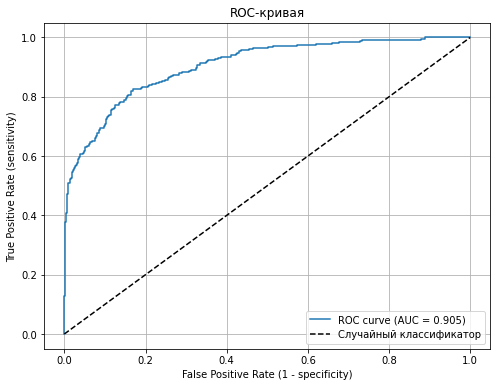

In [63]:
# Получаем вероятности положительного класса
y_probs = cat_best_model.predict_proba(X_test)[:, 1]

# Считаем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Считаем AUC (площадь под ROC-кривой)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Что показывает график: Ось X (False Positive Rate): доля ложноположительных (1 - специфичность). Ось Y (True Positive Rate): доля истинноположительных (чувствительность). Синяя линия — ROC-кривая нашего классификатора. Черная пунктирная линия — случайный классификатор (базовый уровень, AUC = 0.5). AUC = 0.905 — площадь под ROC-кривой (Area Under Curve).

AUC = 0.905 — это очень высокая метрика, близкая к 1. Это говорит о хорошей способности классификатора различать классы. Кривая резко поднимается вверх и проходит близко к левому верхнему углу — это значит: Высокая чувствительность (много правильных положительных предсказаний). Низкий уровень ложных срабатываний (мало ложноположительных).

Вывод: Классификатор демонстрирует отличное качество, значит модель хорошо предсказывает уход клиента

In [64]:
# Предсказанные метки
y_pred = cat_best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy на тестовой выборке: {accuracy:.3f}")

Accuracy на тестовой выборке: 0.851


Accuracy = 0.851
Высокая доля правильных ответов подтверждает правильность предсказаний, но для бизнеса важнее именно ROC-AUC, чтобы контролировать False Positive и False Negative:
False Positive (FP) - клиент получил промо, хотя не собирался уходить.
False Negative (FN) - клиент ушёл без предложения.
Высокий ROC-AUC показывает, что модель хорошо балансирует между FP и FN.

<div class="alert alert-block alert-danger">
    
❌ <s><b>Ревью 1</b>: Слово "точность" лучше использовать осторожно, так как точность - это метрика качества, которую в этом проекте анализировать не нужно. Accuracy (долю объектов, для которых мы правильно предсказали класс) не принято называть точностью (долей правильно предсказанных объектов первого класса среди всех объектов, предсказанных этим классом - ушедших в нашем случае). Подробности [здесь](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).</s>
    
</div>

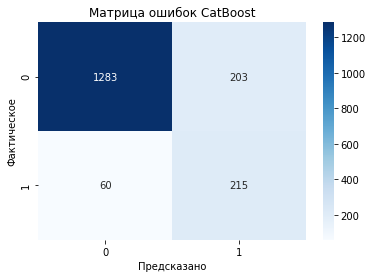

Матрица ошибок:
[[1283  203]
 [  60  215]]

Отчёт по метрикам классификации:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1486
           1       0.51      0.78      0.62       275

    accuracy                           0.85      1761
   macro avg       0.73      0.82      0.76      1761
weighted avg       0.89      0.85      0.86      1761



In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказано')
plt.ylabel('Фактическое')
plt.title('Матрица ошибок CatBoost')
plt.show()

print("Матрица ошибок:")
print(cm)

print("\nОтчёт по метрикам классификации:")
print(classification_report(y_test, y_pred))

True Negative (TN) = 1283: большинство клиентов, которые остались, модель корректно отнесла к категории «не уйдут». Это снижает риск ненужных затрат на акции.
False Positive (FP) = 203: клиенты, которым отправили промо, хотя они не собирались уходить. Это ненужные акции, которые можно считать незначительной потерей.
False Negative (FN) = 60: клиенты, которые ушли, но модель не предсказала уход. Это критично, так как компания упустила возможность удержать этих клиентов.
True Positive (TP) = 215: клиенты, которые ушли и были правильно предсказаны. Компания может с ними работать через акции удержания.

Выводы для бизнеса:
False Positive низкие (203 случаев) – модель не злоупотребляет ненужными акциями, минимизируя расходы на клиентов, которые не собирались уходить.
False Negative (60 случаев) – есть небольшой риск упущенных клиентов, но в целом модель хорошо идентифицирует уходящих.
Точность и полнота (precision/recall) высокая – модель подходит для использования в системе удержания клиентов.


<div class="alert alert-block alert-danger">
❌ <s><b>Ревью 1</b>:
    
- Порог на тестовой выборке не подбирают. Это подгонка результата. Подбор порога - это тоже элемент обучения, а тестовая в обучении не должна принимать участие.
- Если и подбирают пороги, то это делают либо на кросс-валидации по обучающей выборке (потребует усилий), либо на отдельной выборке, но не тестовой. На тестовой выборке можно лишь проверить качество модели и предлагаемого порога.</s>
</div>

              feature  importance
11       use_duration   54.305977
4       total_charges   11.898667
3     monthly_charges    9.165438
0                type    7.148131
10     multiple_lines    4.456084
2      payment_method    3.666548
12       num_services    2.906763
7             partner    1.977026
9    internet_service    1.809937
6      senior_citizen    0.836149
8          dependents    0.729557
5              gender    0.555360
1   paperless_billing    0.544361


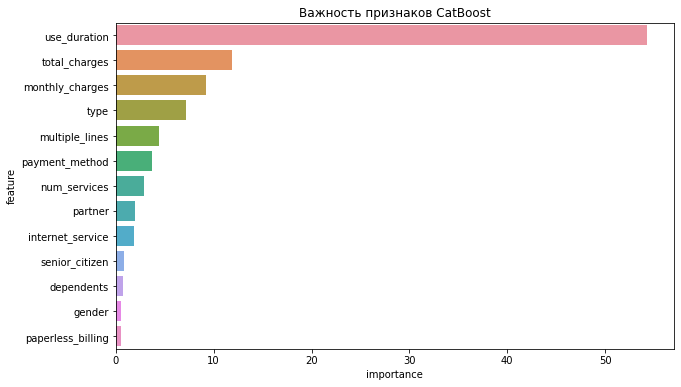

In [66]:
# Получаем важность признаков
feature_importances = cat_best_model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)
print(feat_imp_df)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title('Важность признаков CatBoost')
plt.show()

Топ-3 признака по важности:
- use_duration — 54.3%
- total_charges — 11.9%
- monthly_charges — 9.7%
Эти признаки показывают, что уход клиентов сильно зависит от суммарных расходов и длительности пользования услугой.
Меньший вклад признаков типа partner, gender, dependents говорит о том, что демографические данные менее значимы для предсказания ухода.

<div class="alert alert-block alert-success">
✔️ <b>Ревью 2</b>: Важность признаков оценена правильно.
</div>

## Общий вывод

В ходе проекта была поставлена цель построить модель для прогнозирования оттока клиентов с метрикой ROC-AUC ≥ 0.85;
Основная бизнес-цель — снизить убытки, связанные с неэффективными акциями по удержанию (промо-купоны, скидки и пакеты стимулирования);
Важные болевые точки маркетологов:
False Positive (FP) — предложили промо, а клиент не собирался уходить;
False Negative (FN) — клиент ушёл, а ничего не предложили.

### Основные этапы

Все основные этапы плана были выполнены:

- Исследован и объединён исходный датасет;
- Проведена предобработка данных (заполнение пропусков, обработка категориальных признаков, создание синтетических признаков);
- Проведена визуализация распределений признаков и анализ баланса классов;
- Построены и протестированы модели машинного обучения с подбором гиперпараметров;
- Проанализирована важность признаков и построена корреляционная матрица.

### Ключевые шаги решения задачи

- Объединение таблиц по customer_id с обработкой пропусков (услуги без подключения → "No internet service"/"No phone service", total_charges для новых клиентов = 0);
- Создание целевой переменной customer_churn (1 = клиент ушёл, 0 = остался);
- Генерация синтетических признаков: длительность пользования услугами (use_duration), количество подключённых услуг (num_services);
- Исследовательский анализ и визуализация распределений по целевой переменной для выявления ключевых признаков, влияющих на отток;
- Обучение моделей: подбор гиперпараметров и кросс-валидация для оценки качества.

### Используемые признаки

- Исходные признаки: monthly_charges, total_charges, type, payment_method, gender, senior_citizen, partner, dependents, internet_service, multiple_lines, online_security, online_backup, device_protection, tech_support, streaming_t_v, streaming_movies, paperless_billing.
- Синтетические признаки: use_duration, num_services.
- Используемые признаки: total_charges, use_duration, monthly_charges, internet_service,   multiple_lines, num_services, payment_method, type, partner, paperless_billing, gender, dependents, senior_citizen

### Предобработка данных

- Пропуски в числовых признаках (total_charges) заполнены 0;
- Пропуски в сервисных колонках заполнены специальными значениями ("No internet service", "No phone service");
- Приведение категориальных признаков к единому формату;
- Создание целевой переменной customer_churn (1 = ушёл, 0 = остался).

### Сводная таблица моделей

| Модель                     | Лучший ROC-AUC (CV) | Время обучения финальной модели (refit_time_) |
|-----------------------------|-------------------|-----------------------------------------------|
| Логистическая регрессия     | 0.763             | 0.4 секунд                                   |
| Random Forest Classifier    | 0.826             | 0.45 секунд                                   |
| LightGBM                    | 0.870             | 14.89 секунд                                   |
| CatBoost                    | 0.901            | 3.5 секунд                |


### Выбор модели

Рекомендуется использовать CatBoost:
- Высокое качество (ROC-AUC ≥ 0.85);
- Приемлемое время обучения;
- Хорошая работа с категориальными признаками без дополнительного кодирования.

### Затруднения и их решение

- Пропуски и разная структура данных — обработаны логически корректными заменами;
- Баланс классов — учтён при обучении через метрики ROC-AUC и подбор порога классификации;
- (FP/FN) — можно учитывать при подборе порога классификации для минимизации затрат на промо и удержание(в данном случае не имеет большого смысла)

### Рекомендации по внедрению

- Модель CatBoost готова к эксплуатации для прогнозирования оттока;
- Следует проводить постоянный мониторинг и переобучение модели на новых данных;
- Использовать прогнозы модели для акций по удержанию клиентов.

### Идеи для будущего улучшения

- Добавить внешние данные: обращения в поддержку, участие в кампаниях, отзывы клиентов;
- Генерация новых синтетических признаков(динамика платежей, активности);


<div class="alert alert-success">
<b>✔️ Заключение ментора:</b> Мария, рад сообщить, что твой проект принят. Это значит, что ты справилась с поставленной задачей. Поздравляю!
    
Спасибо за использование phik на этапе анализа данных. Очень хорошо, что ты применила в работе технику обучения моделей с подбором гиперпараметров на кросс-валидации. Твои конвейеры для обработки признакового пространства сделали оценку моделей более объективной и помогли им обучаться прилежнее. Уверен, заказчик по достоинству оценит твои предложения по дальнейшму улучшению модели и бизнеса. Отдельное спасибо за внимательное отношение к моим комментариям и рекомендациям.

Тема проекта действительно была интересная, а решение можно улучшать и дальше. Фактически наша задача является этапом более сложного процесса, называемого  <a href="https://newtechaudit.ru/vvedenie-v-uplift-modelirovanie">uplift-моделированием,</a> который подразумевает A/B тесты с контролем метрик, по результатам которых может корректироваться и порог классификации. Вот ещё некоторые источники по теме:
    
- [Туториал по uplift моделированию](https://habr.com/ru/companies/ru_mts/articles/485980/)
- [Курс на ODS](https://ods.ai/tracks/uplift-modelling-course)    

Надеюсь, что финальный проект добавил мотивации к получению новых знаний. Со своей стороны хотел бы порекомендовать тебе некоторые материалы для дальнейшего совершенствования:

https://www.youtube.com/watch?v=xl1fwCza9C8 познавательное видео по настройке модели CatBoost (в ней есть много способов предотвращать переобучение);

https://habr.com/ru/company/ods/blog/322626/ на Habr можно закрепить свои знания, порешав задачи из цикла статей — Открытый курс машинного обучения;

https://github.com/esokolov/ml-course-hse — на гитхаб есть репозиторий с задачами из курса по машинному обучению от Евгения Соколова, можно использовать как дополнительный материал для закрепления знаний.

https://habr.com/ru/company/avito/blog/571094/ — материалы по A/B тестам.

Также хочу поделиться опытом и вкратце рассказать о том, в какие направления можно подаваться на работу и какие навыки там пригодятся:

Направление аналитики: хорошие знания теории вероятностей и математической статистики; базовые знания библиотек ML; уверенные знания SQL; умение решать задачи по A/B тестам; плюсом будет знание специальных инструментов для аналитики по визуализации результатов.

Направление ML: уверенные знания классических моделей машинного обучения; хорошие знания SQL; понимание алгоритмов машинного обучения — как устроена модель линейной регрессии, модели случайного леса, градиентного бустинга и т.д. На собеседовании могут спросить, как работает какая-нибудь модель «под капотом», очень любят градиентный бустинг и случайный лес. Здесь точно пригодится https://academy.yandex.ru/handbook/ml - онлайн-учебник от Школы анализа данных Яндекса, в котором описаны теоретические основы работы моделей машинного обучения.

В некоторых компаниях при устройстве на работу или стажировку, например в Яндексе, нужно решить тест на алгоритмические задачи. По алгоритмам есть много разных курсов, платных и бесплатных. Можно попробовать Тренировки по Алгоритмам от Яндекса https://yandex.ru/yaintern/algorithm-training. Также есть и у Практикума курс по алгоритмам.
    
Мария, прими ещё раз мои поздравления и пожелания новых успехов!
</div>